In [3]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter()           masks stats::filter()
x ggplot2::geom_errorbarh() masks ggstance::geom_errorbarh()
x dplyr::lag()              masks stats::lag()


In [4]:
library(nycflights13)

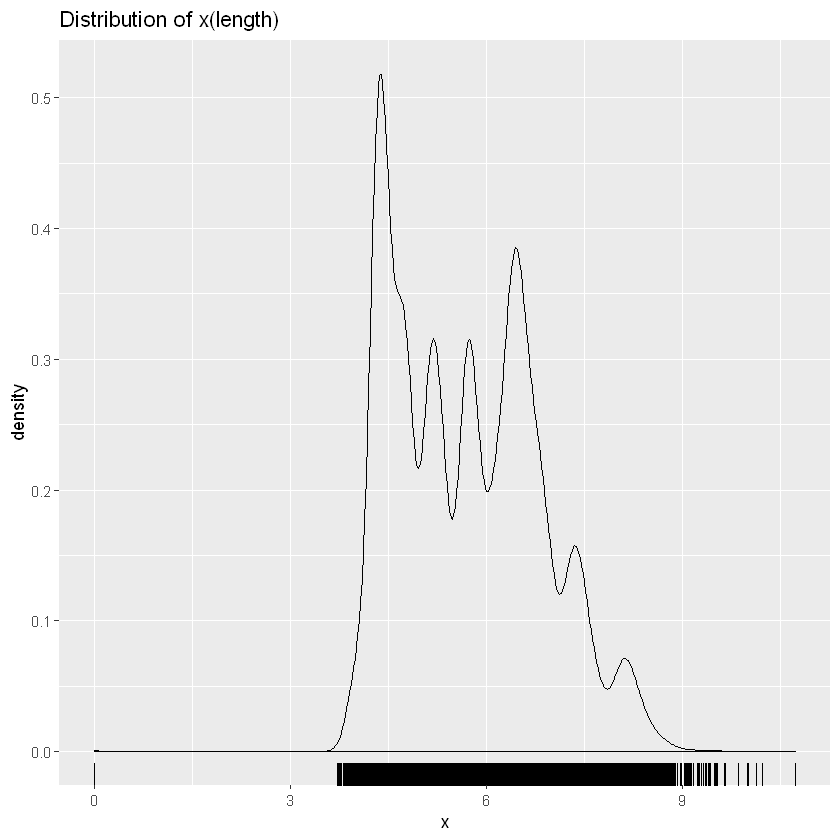

In [5]:
diamonds %>% 
  ggplot(aes(x = x)) +
  geom_density() +
   geom_rug() +
  labs(title = 'Distribution of x(length)')

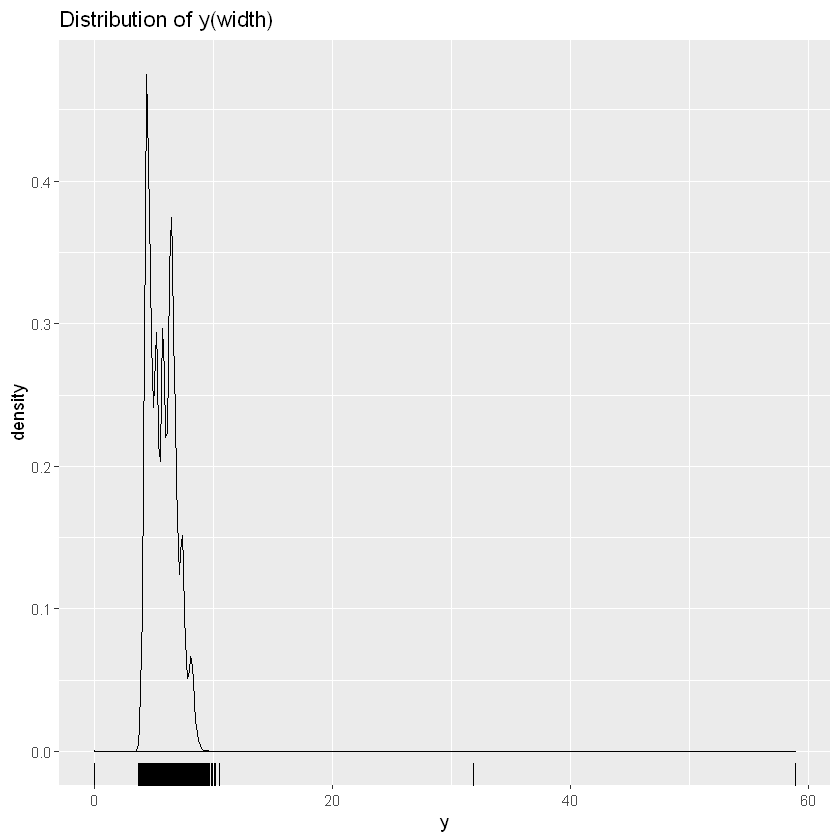

In [6]:
diamonds %>% 
  ggplot(aes(x = y)) +
  geom_density() +
   geom_rug() +
  labs(title = 'Distribution of y(width)')

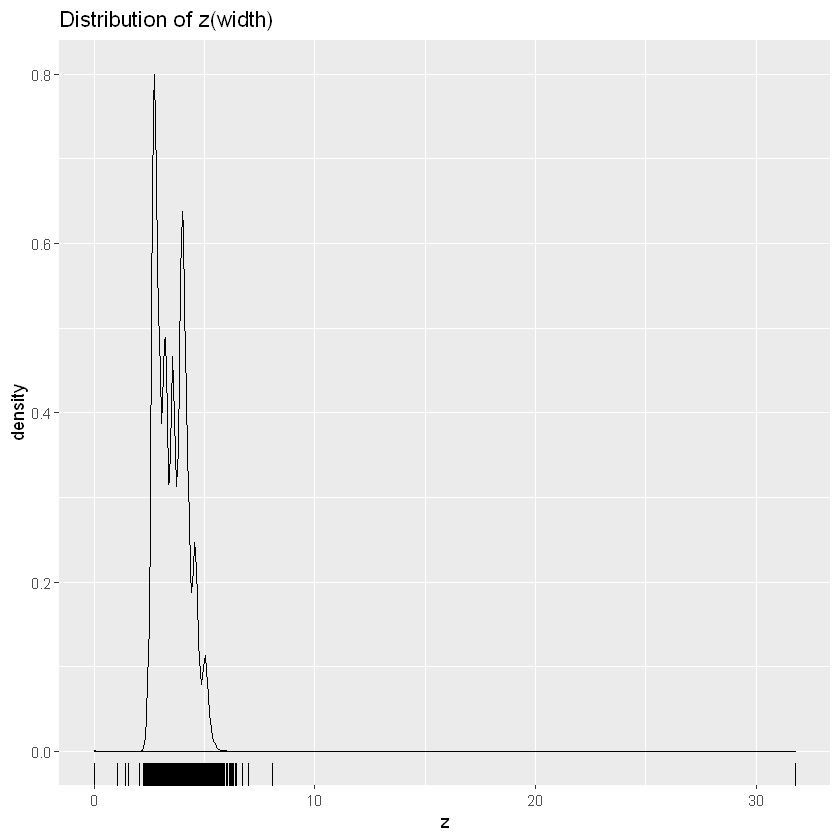

In [7]:
diamonds %>% 
  ggplot(aes(x = z)) +
  geom_density() +
   geom_rug() +
  labs(title = 'Distribution of z(width)')

There are large outliers in y and z indicating possible data entry errors.

Explore the distribution of price. Do you discover anything unusual or surprising? (Hint: Carefully think about the binwidth and make sure you try a wide range of values.)

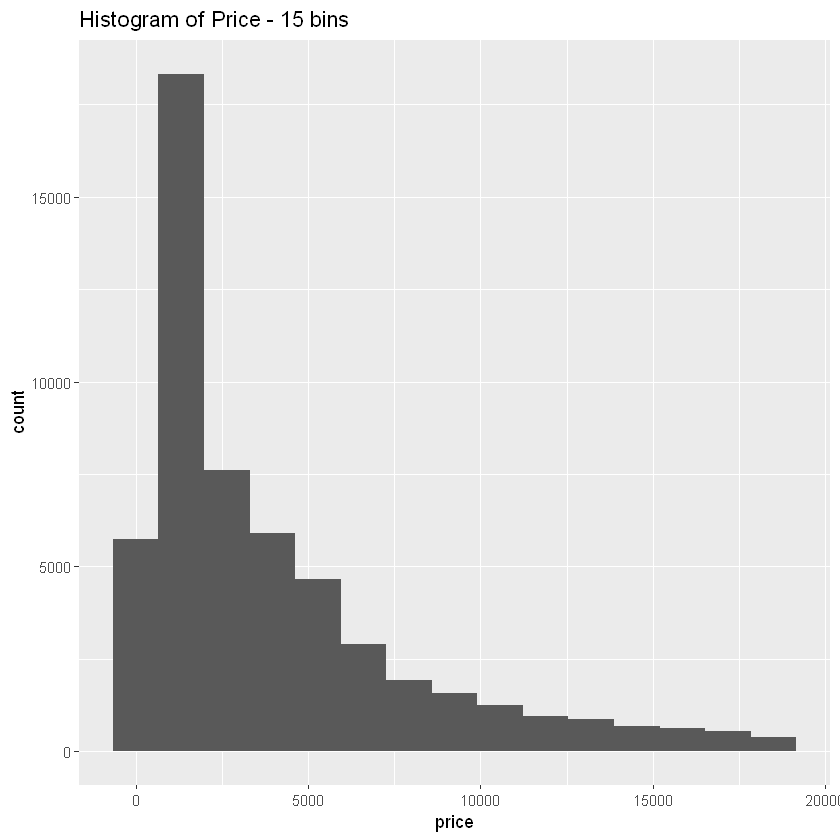

In [8]:
diamonds %>% 
  ggplot(aes(x = price)) +
  geom_histogram(bins = 15) +
  ggtitle("Histogram of Price - 15 bins")

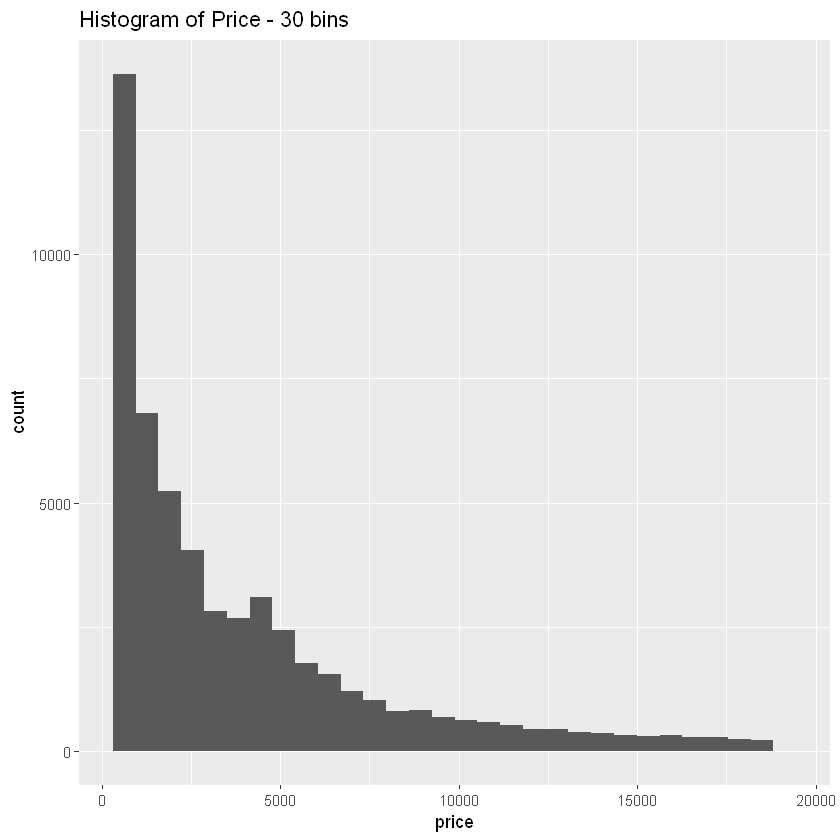

In [9]:
diamonds %>% 
  ggplot(aes(x = price)) +
  geom_histogram(bins = 30) +
  ggtitle("Histogram of Price - 30 bins")

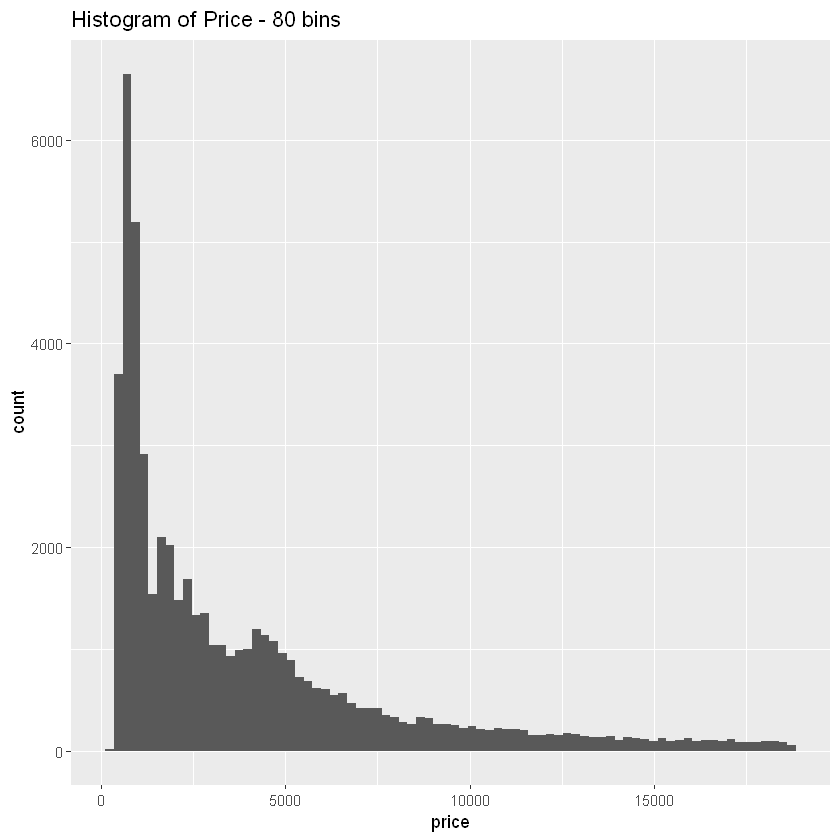

In [10]:
diamonds %>% 
  ggplot(aes(x = price)) +
  geom_histogram(bins = 80) +
  ggtitle("Histogram of Price - 80 bins")

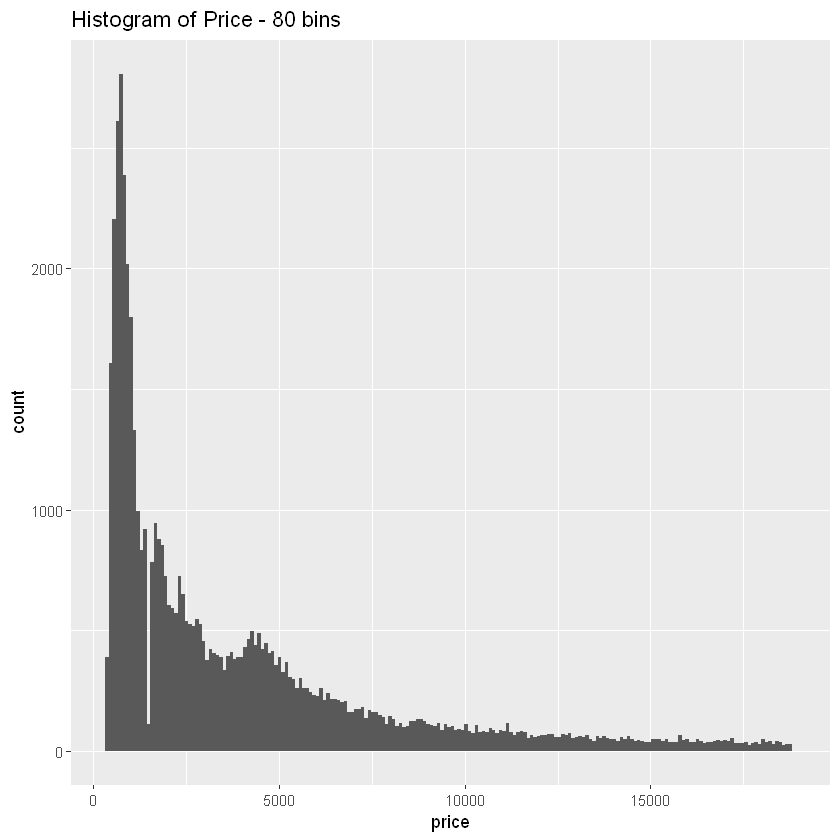

In [11]:
diamonds %>% 
  ggplot(aes(x = price)) +
  geom_histogram(bins = 200) +
  ggtitle("Histogram of Price - 80 bins")

The distribution is strongly right skewed, which is unsurprising since there will be fewer diamonds in the higher price ranges
When looking at the distribution with a large number of bins it is clear there are much fewer diamonds priced at $1500 than is expected


How many diamonds are 0.99 carat? 23  
How many are 1 carat? 1558  
What do you think is the cause of the difference?  _It is most likely diamond producers are rounded up the vast majority of diamonds that land at .99 carats since that is a much more appealing number to the consumer_



In [12]:
diamonds %>% 
  filter(carat == 0.99) %>% 
  count()

n
<int>
23


In [13]:
diamonds %>% 
  filter(carat == 1) %>% 
  count()

n
<int>
1558


Compare and contrast coord_cartesian() vs xlim() or ylim() when zooming in on a histogram. xlim() and ylim() remove the values that don’t fall within the specified range while coord_cartesian() just clips off the parts of the graph that fall outside of the range  
What happens if you leave binwidth unset? _Defaults to using 30 bins_
What happens if you try and zoom so only half a bar shows?

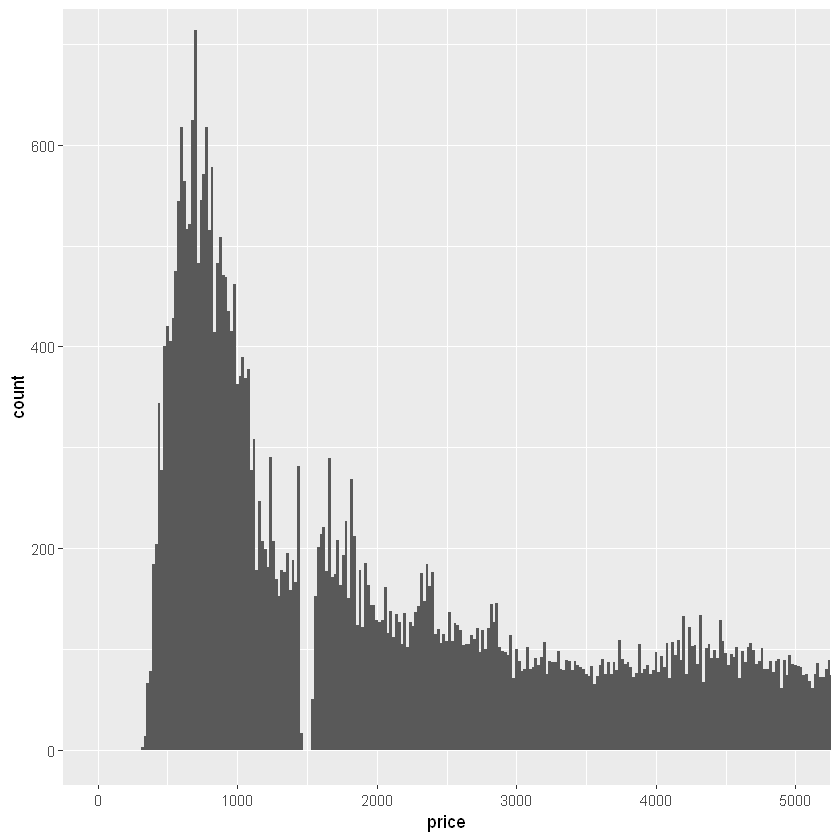

In [14]:
ggplot(data = diamonds) +
  geom_histogram(mapping = aes(x = price), binwidth = 20) +
  coord_cartesian(xlim = c(0,5000), ylim = c(0,700))

Warning message:
"Removed 14714 rows containing non-finite values (stat_bin)."Warning message:
"Removed 3 rows containing missing values (geom_bar)."

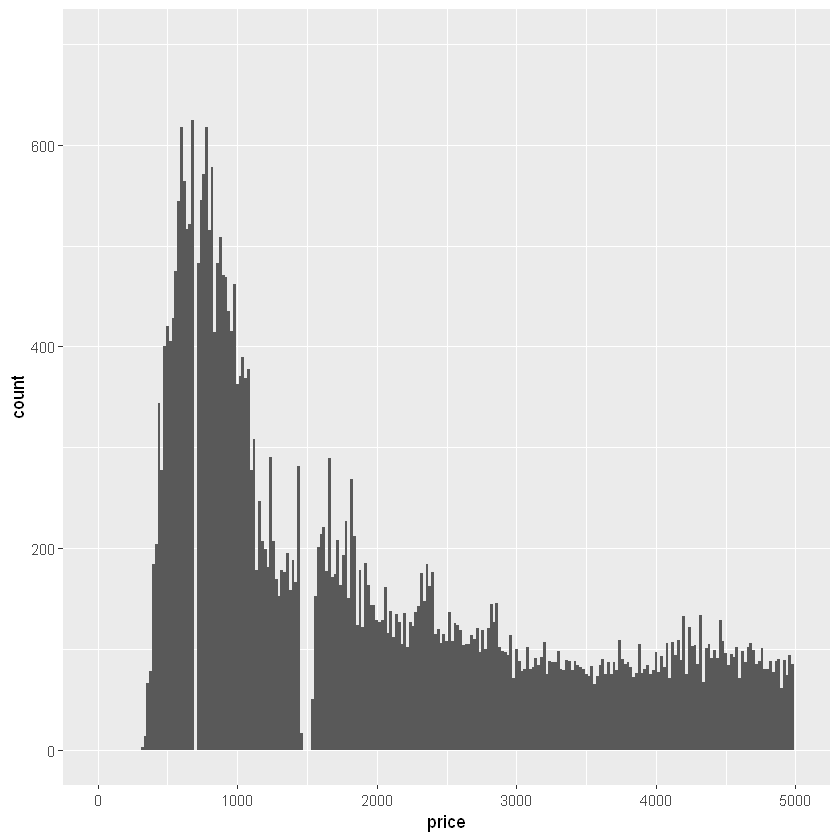

In [15]:
ggplot(data = diamonds) +
  geom_histogram(mapping = aes(x = price), binwidth = 20) +
  xlim(c(0,5000)) +
  ylim(c(0,700))

7.4 Missing Values

What happens to missing values in a histogram? _NAs are omitted from histograms since they are for continuous value and there is no natural place to put them_
What happens to missing values in a bar chart? Why is there a difference?

Warning message:
"Removed 3 rows containing non-finite values (stat_bin)."

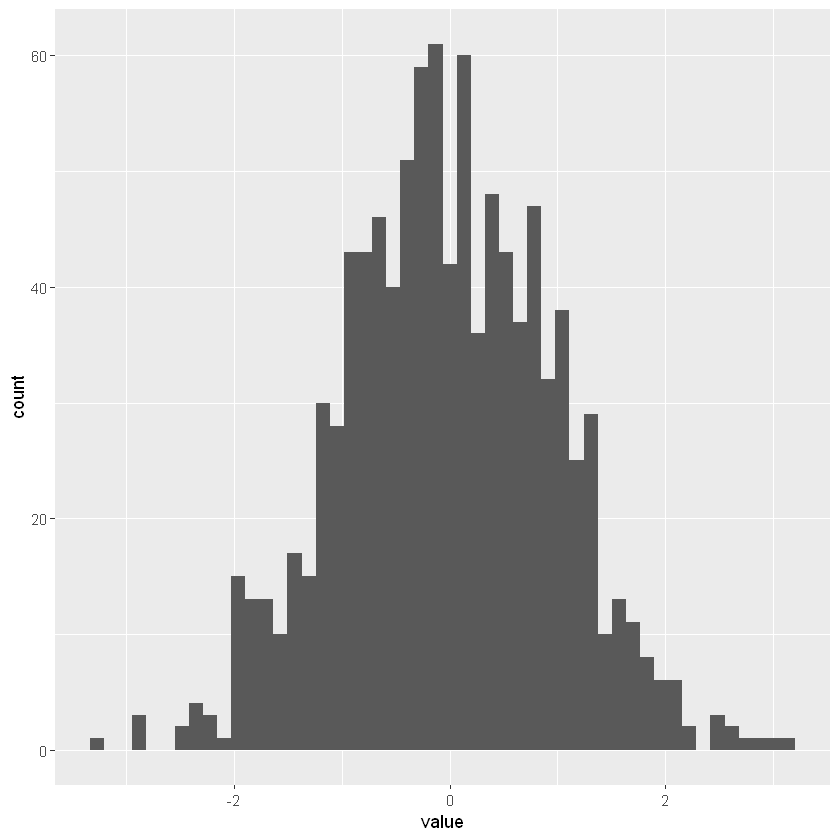

In [16]:
data.frame(value = c(NA, NA, NA, rnorm(1000,0,1))) %>% ggplot() +
  geom_histogram(mapping = aes(x = value), bins = 50)

What happens to missing values in a bar chart?  _NAs are placed in their own category with bar plots since they can easily be separated from the other categories_

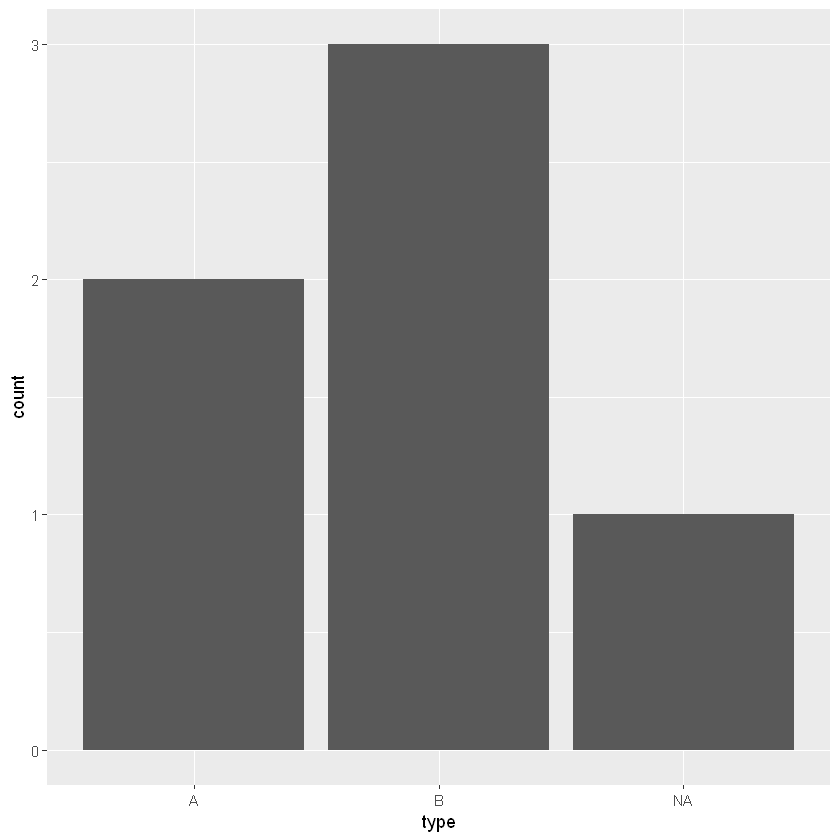

In [17]:
ggplot(data = data.frame(type = c('A','A','B','B','B',NA))) + 
  geom_bar(mapping = aes(x = type))

What does na.rm = TRUE do in mean() and sum()?  
_It ignores NA values and completes calculation on the remaining values_

In [18]:
mean(c(1,2,3,NA,4), na.rm = TRUE)
sum(c(1,2,3,NA,4), na.rm = TRUE)

[1] 2.5

[1] 10

### 7.5 Covariation

Use what you’ve learned to improve the visualisation of the departure times of cancelled vs. non-cancelled flights.

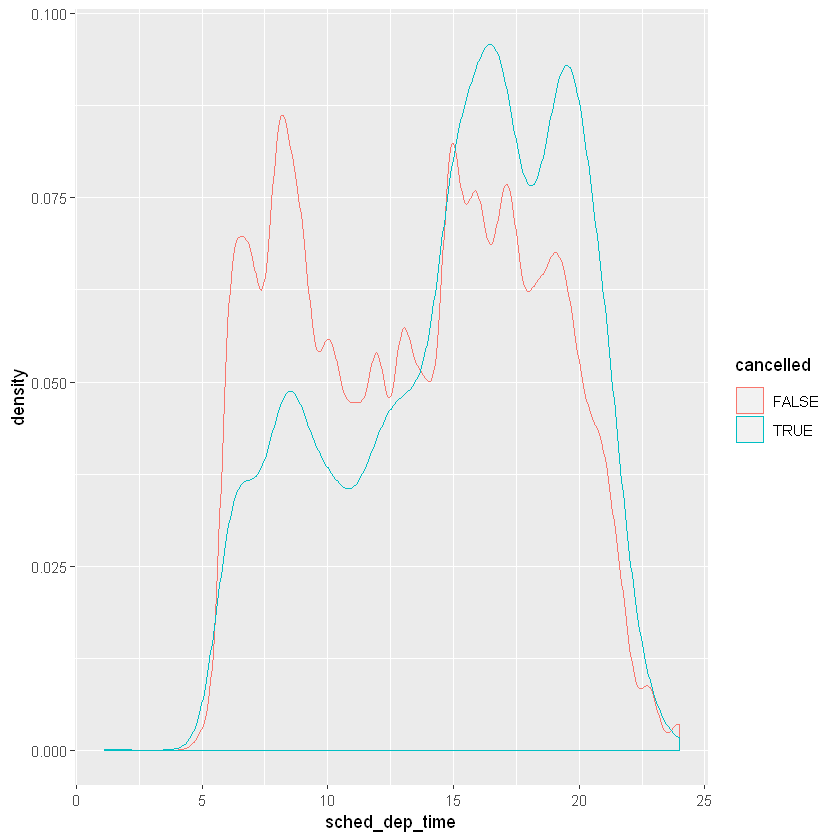

In [19]:
flights %>% 
  mutate(
    cancelled = is.na(dep_time),
    sched_hour = sched_dep_time %/% 100,
    sched_min = sched_dep_time %% 100,
    sched_dep_time = sched_hour + sched_min / 60
  ) %>% 
  ggplot(mapping = aes(x = sched_dep_time, y = ..density..)) + 
    geom_density(mapping = aes(colour = cancelled))

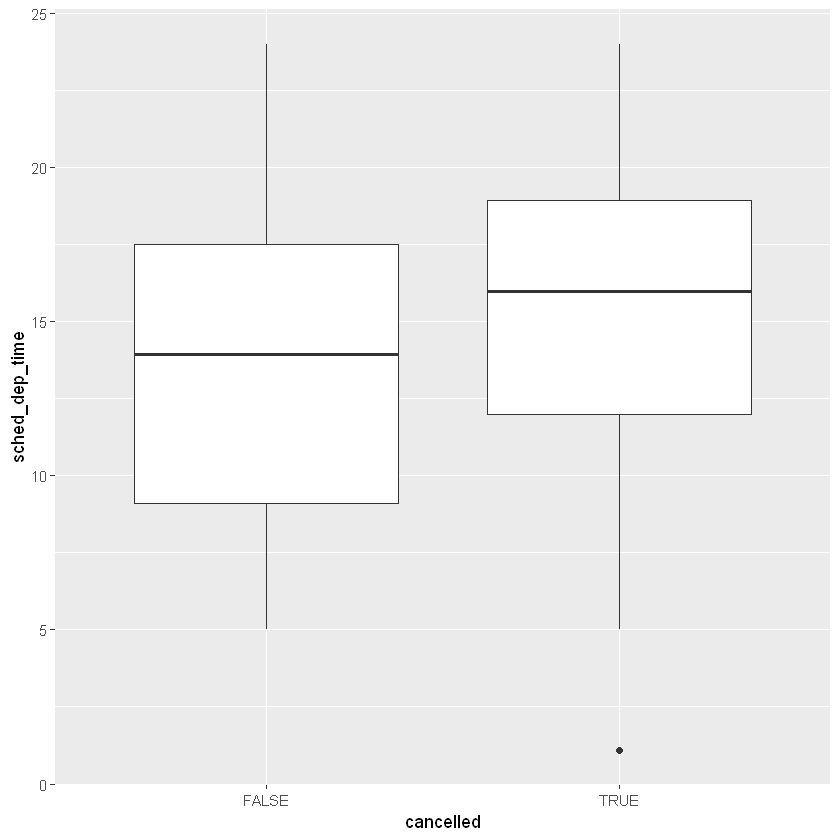

In [20]:
flights %>% 
  mutate(
    cancelled = is.na(dep_time),
    sched_hour = sched_dep_time %/% 100,
    sched_min = sched_dep_time %% 100,
    sched_dep_time = sched_hour + sched_min / 60
  ) %>% 
  ggplot(mapping = aes(x = cancelled, y = sched_dep_time)) + 
    geom_boxplot()

What variable in the diamonds dataset is most important for predicting the price of a diamond? _carat is the most correlated variable with price, so it is the most important variable in predicting price of diamonds_

How is that variable correlated with cut? _carat and cut are slightly negatively correlated, meaning diamonds of higher weights tend to have a lower cut rating._


In [21]:
diamonds %>%
  mutate(cut = as.numeric(cut),
         color = as.numeric(color),
         clarity = as.numeric(clarity)) %>%
  select(price, everything()) %>%
  cor()

,price,carat,cut,color,clarity,depth,table,x,y,z
price,1.00000000,0.92159130,-0.05349066,0.17251093,-0.14680007,-0.01064740,0.1271339,0.88443516,0.86542090,0.86124944
carat,0.92159130,1.00000000,-0.13496702,0.29143675,-0.35284057,0.02822431,0.1816175,0.97509423,0.95172220,0.95338738
cut,-0.05349066,-0.13496702,1.00000000,-0.02051852,0.18917474,-0.21805501,-0.4334046,-0.12556524,-0.12146187,-0.14932254
color,0.17251093,0.29143675,-0.02051852,1.00000000,0.02563128,0.04727923,0.0264652,0.27028669,0.26358440,0.26822688
clarity,-0.14680007,-0.35284057,0.18917474,0.02563128,1.00000000,-0.06738444,-0.1603268,-0.37199853,-0.35841962,-0.36695200
depth,-0.01064740,0.02822431,-0.21805501,0.04727923,-0.06738444,1.00000000,-0.2957785,-0.02528925,-0.02934067,0.09492388
table,0.12713390,0.18161755,-0.43340461,0.02646520,-0.16032684,-0.29577852,1.0000000,0.19534428,0.18376015,0.15092869
x,0.88443516,0.97509423,-0.12556524,0.27028669,-0.37199853,-0.02528925,0.1953443,1.00000000,0.97470148,0.97077180
y,0.86542090,0.95172220,-0.12146187,0.26358440,-0.35841962,-0.02934067,0.1837601,0.97470148,1.00000000,0.95200572
z,0.86124944,0.95338738,-0.14932254,0.26822688,-0.36695200,0.09492388,0.1509287,0.97077180,0.95200572,1.00000000


Why does the combination of those two relationships lead to lower quality diamonds being more expensive?

Install the ggstance package, and create a horizontal boxplot. How does this compare to using coord_flip()

In [22]:
library(ggstance)

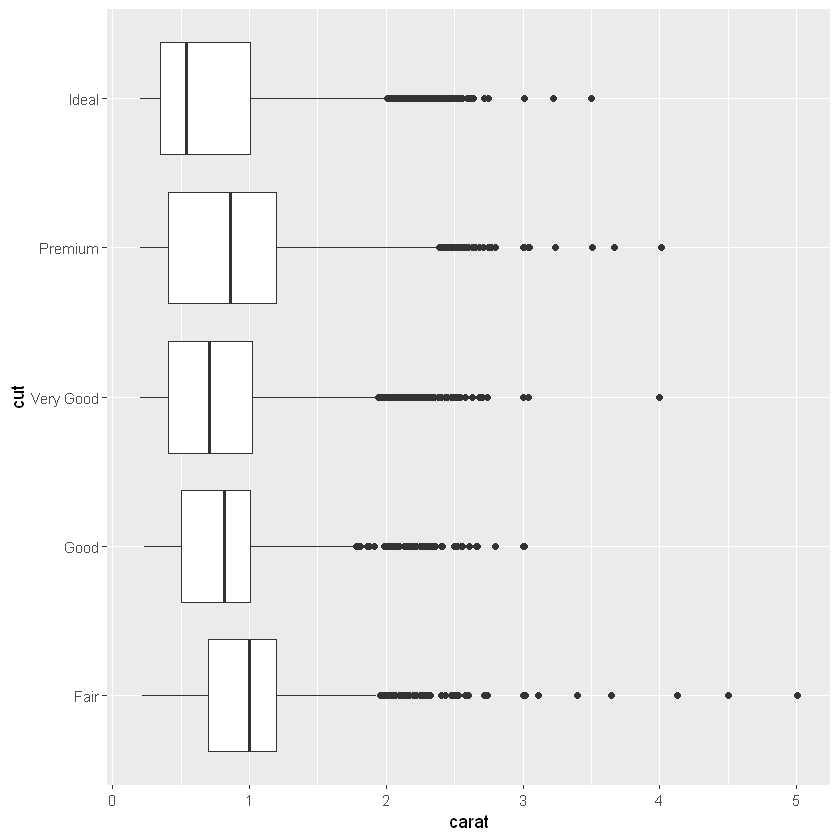

In [24]:
diamonds %>%
  ggplot(aes(carat, cut)) +
  geom_boxploth()

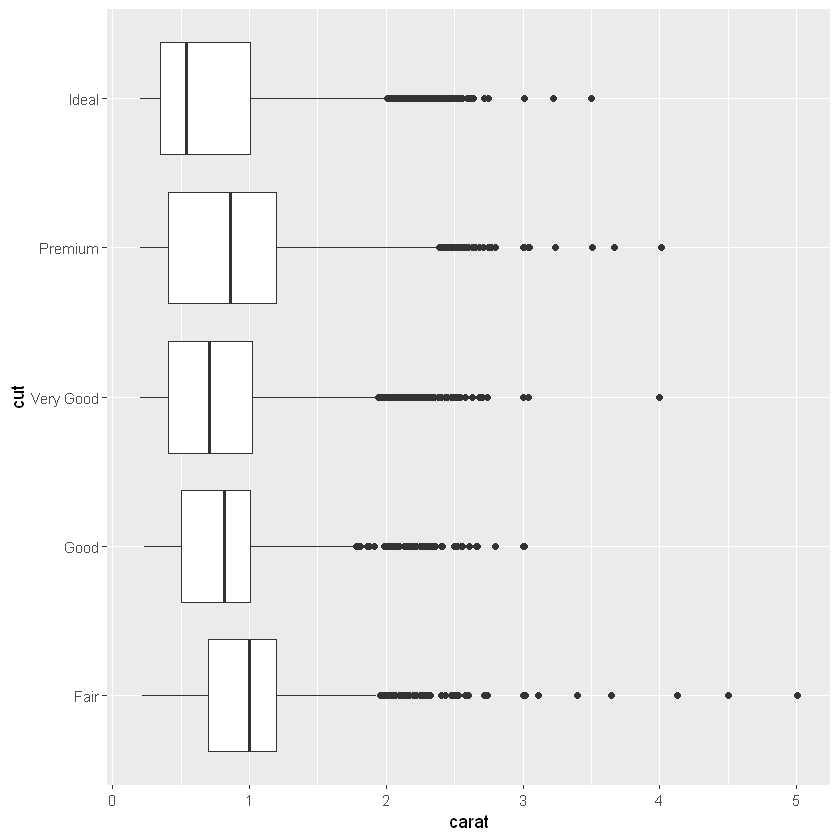

In [23]:
diamonds %>%
  ggplot(aes(cut, carat)) +
  geom_boxplot() +
  coord_flip()

One problem with boxplots is that they were developed in an era of much smaller datasets and tend to display a prohibitively large number of “outlying values”. One approach to remedy this problem is the letter value plot. Install the lvplot package, and try using geom_lv() to display the distribution of price vs cut. What do you learn? How do you interpret the plots?

In [25]:
library(lvplot)

Warning message:
"package 'lvplot' was built under R version 3.6.2"

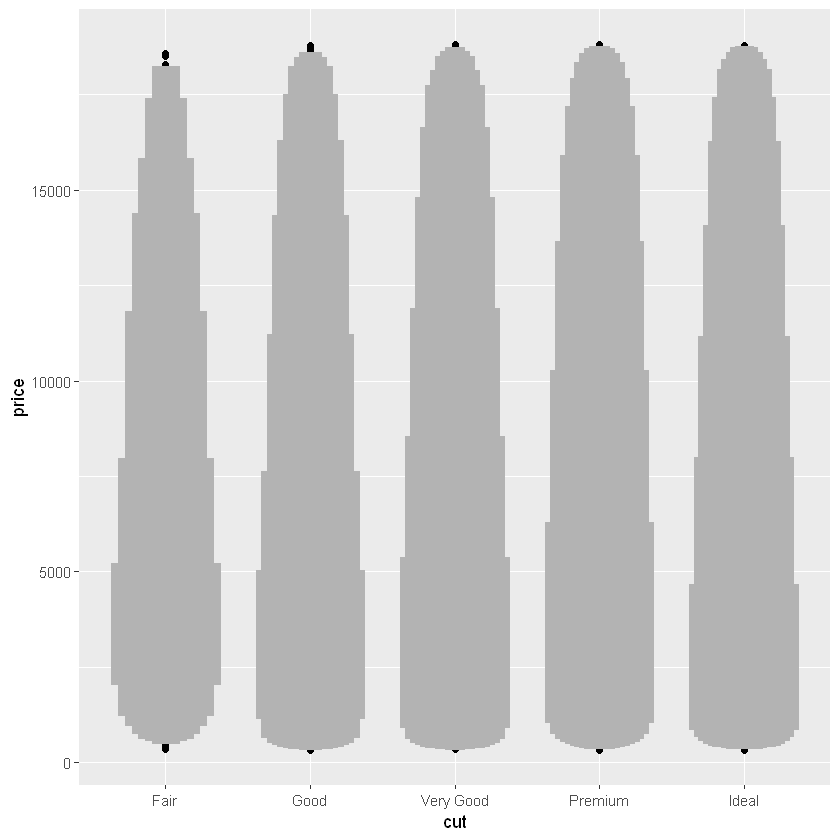

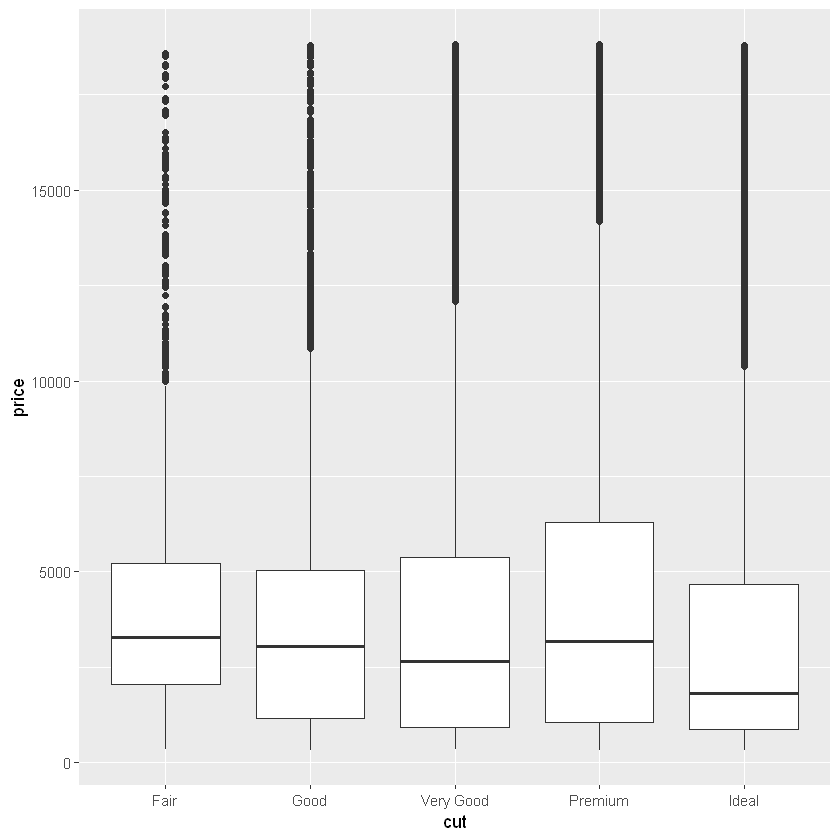

In [28]:
p <- ggplot(diamonds, aes(cut, price))
p + geom_lv()

p <- ggplot(diamonds, aes(cut, price))
p + geom_boxplot()



Compare and contrast geom_violin() with a facetted geom_histogram(), or a coloured geom_freqpoly(). What are the pros and cons of each method?  

The violin plot is extremely useful to compare the distributions. 
Histograms are trickier to compare, although they might be a bit useful when allowing the y axis to vary across plots. 
Freqpoly are both misleading because the frequency of each category influences greatly the visual display. In both plots we'd have to adjust for it by freeing th y axis  (histogram) and plotting densityin the y axis (freqpoly).

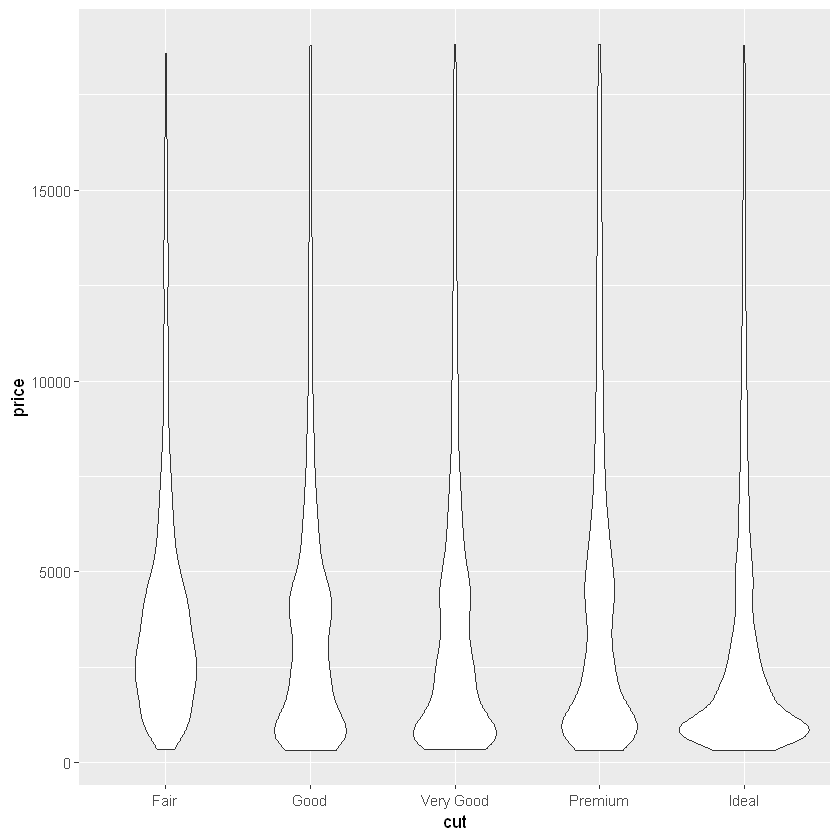

In [30]:
diamonds %>%
  ggplot(aes(cut, price)) +
  geom_violin()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


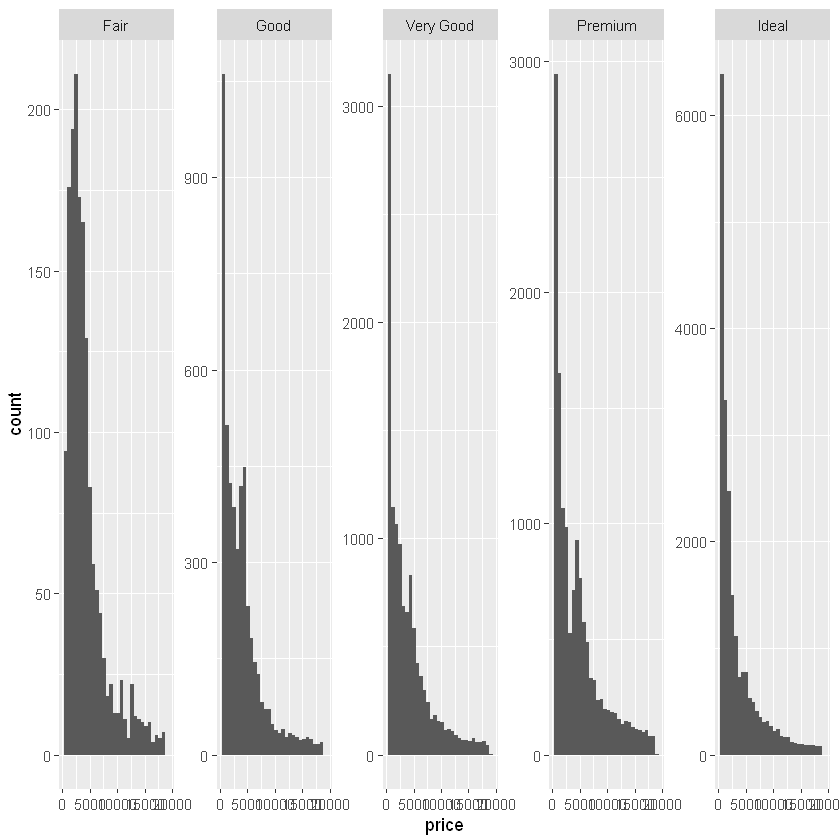

In [31]:
diamonds %>%
  ggplot(aes(price)) +
  geom_histogram() +
  facet_wrap(~ cut, scale = "free_y", nrow = 1)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


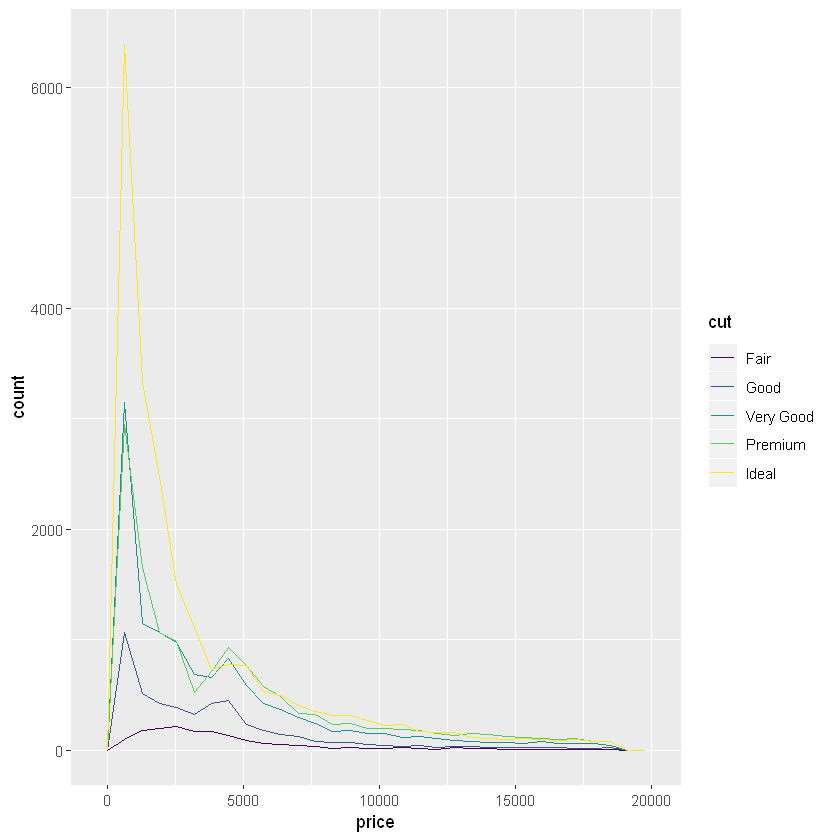

In [32]:
diamonds %>%
  ggplot(aes(price)) +
  geom_freqpoly(aes(colour = cut))

### 7.5.2.1 Exercises

How could you rescale the count dataset above to more clearly show the distribution of cut within colour, or colour within cut? _By Calculating Peercentage and showing the n_

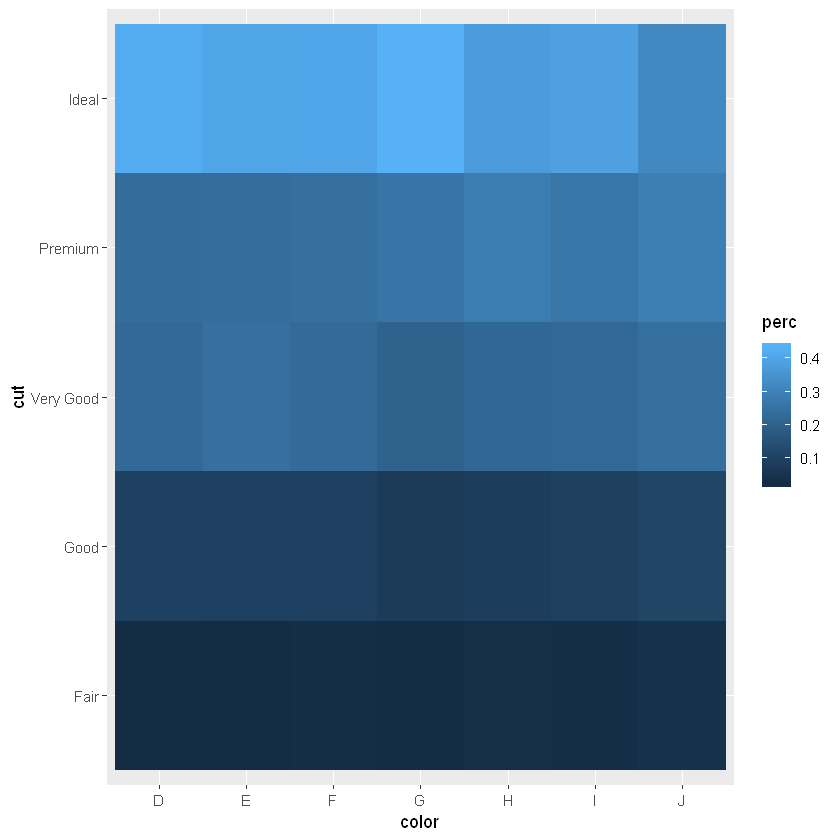

In [39]:
diamonds %>%
  count(color, cut) %>%
  group_by(color) %>%
  mutate(perc = n / sum(n)) %>%
  ggplot(aes(color, cut, fill=perc)) +
  geom_tile()

Use geom_tile() together with dplyr to explore how average flight delays vary by destination and month of year. What makes the plot difficult to read?

#### One thing that makes it extremely difficult to read is that it is difficult to see differences in dep_delay because the higher values are driving the whole color palette upwards. Also, many dest have missing values on some months._

How could you improve it?
#### Two solutions could be done: exclude dest with missing vallues for now and summarise, standardize or rescale the dep_delay so that we con spot differences.

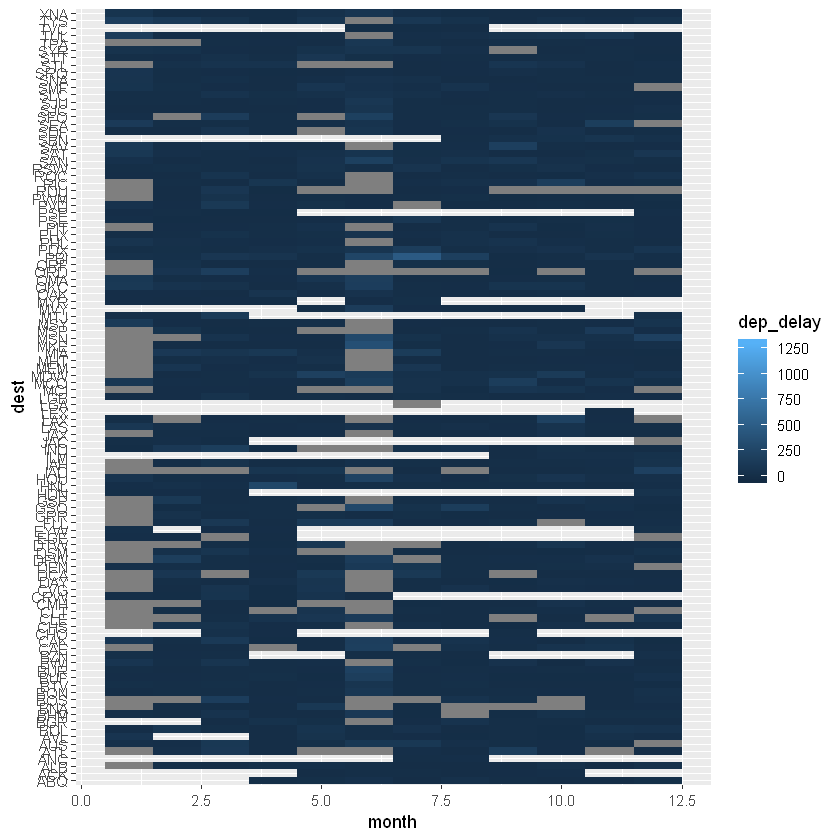

In [42]:
flights %>%
  ggplot(aes(x = month, y = dest, fill = dep_delay)) +
  geom_tile()

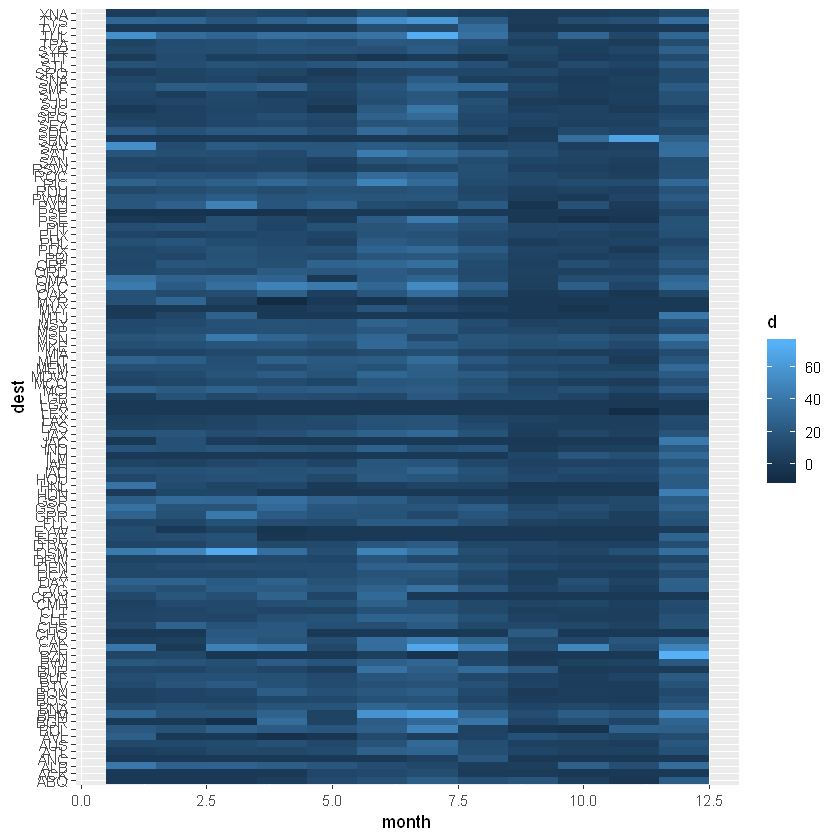

In [44]:
delay_count <- flights %>%
  group_by(month, dest) %>%
  summarise(d = mean(dep_delay, na.rm = TRUE)) %>%
  ungroup


delay_count %>%
  complete(month, dest, fill = list(d = 0)) %>%
  ggplot(aes(month, dest)) +
  geom_tile(aes(fill = d))

Why is it slightly better to use aes(x = color, y = cut) rather than aes(x = cut, y = color) in the example above?
##### Because it's better to have names that we to interpret constantly (and are a bit lengthy) on the y axis.


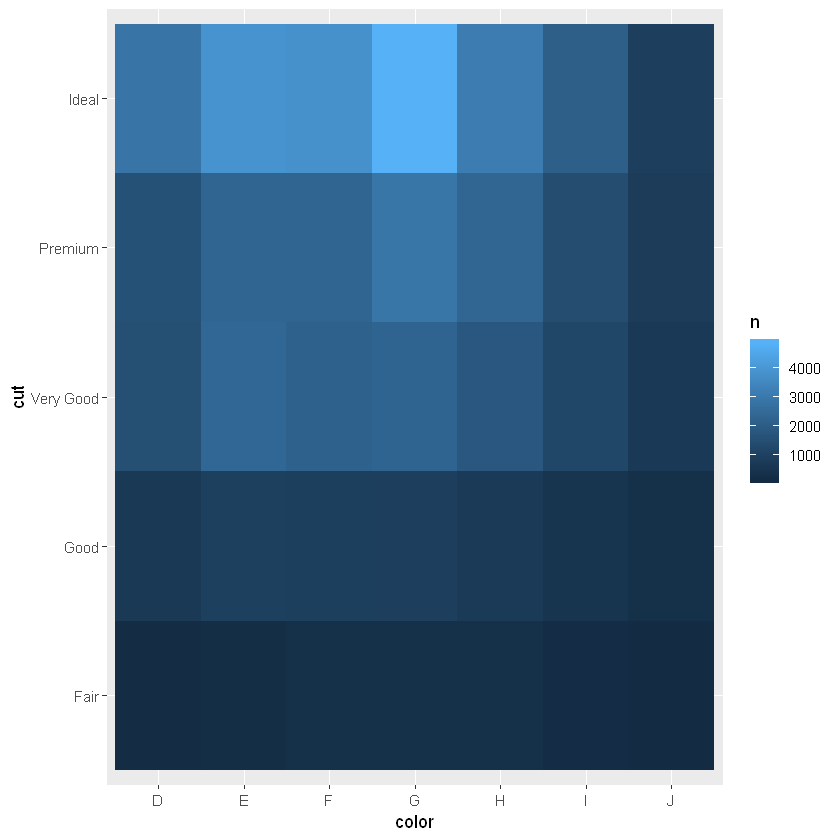

In [48]:
diamonds %>%
  count(color, cut) %>%
  ggplot(aes(x = color, y = cut)) +
  geom_tile(aes(fill = n))

### 5.3.3 Two continuous variables

Instead of summarising the conditional distribution with a boxplot, you could use a frequency polygon. 
What do you need to consider when using cut_width() vs cut_number()?
_cutnumber makes groups with same number of obsrvations n each group. statwidth makes groups based on the metric of the variables_

How does that impact a visualisation of the 2d distribution of carat and price?

Visualise the distribution of carat, partitioned by price.

How does the price distribution of very large diamonds compare to small diamonds? Is it as you expect, or does it surprise you? There's abig variance in price between the large diamonds (5000 to 10000) Whereas small ones have very little variance.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


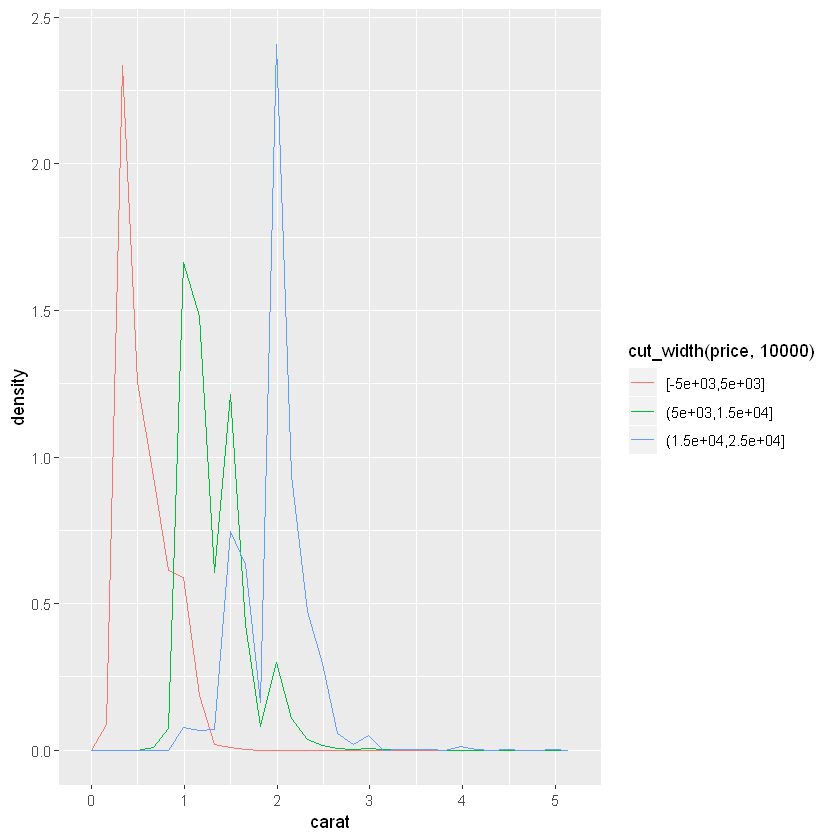

In [55]:
diamonds %>%
  ggplot() +
  geom_freqpoly(aes(x = carat, y = ..density.., color = cut_width(price, 10000)))

Combine two of the techniques you’ve learned to visualise the combined distribution of cut, carat, and price.

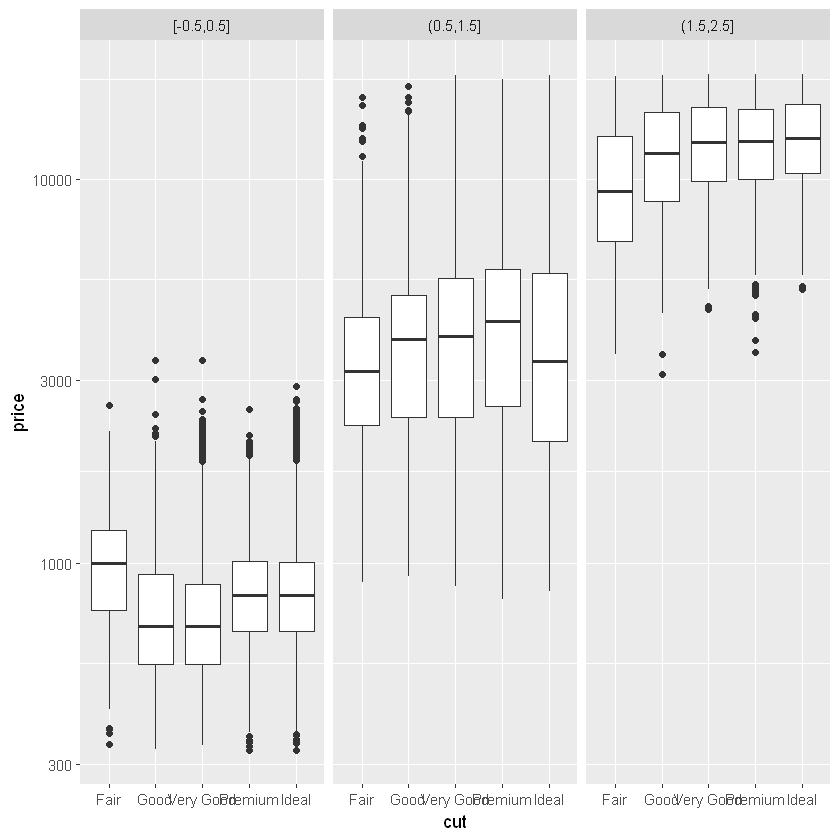

In [59]:
diamonds %>%
  filter(between(carat, 0, 2.5)) %>%
  mutate(carat = cut_width(carat, 1)) %>%
  ggplot(aes(cut, price)) +
  geom_boxplot() +
  scale_y_log10() +
  facet_wrap(~ carat)

Two dimensional plots reveal outliers that are not visible in one dimensional plots. For example, some points in the plot below have an unusual combination of x and y values, which makes the points outliers even though their x and y values appear normal when examined separately.  
#### We get the differences in price we saw before for carat groups but we also see that within each carat groups the differences between the cut in terms of prices is very little. It seems the be that the driving force of price is more carat rather than the cut.

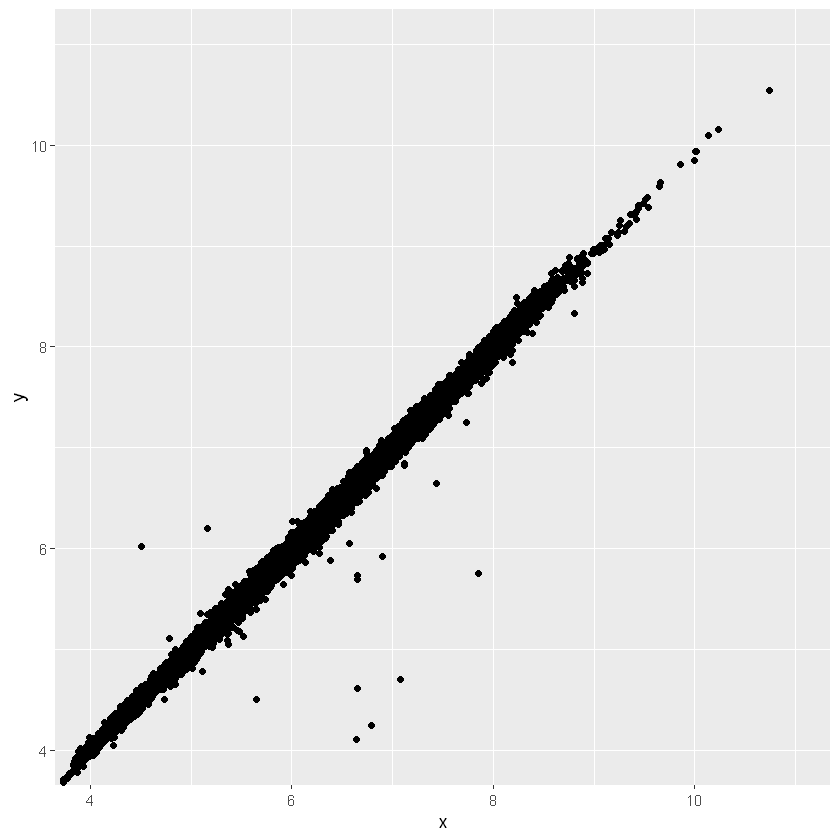

In [63]:
ggplot(data = diamonds) +
  geom_point(mapping = aes(x = x, y = y)) +
  coord_cartesian(xlim = c(4, 11), ylim = c(4, 11))

Why is a scatterplot a better display than a binned plot for this case?  
##### Because binned plots tend to categorize continuous measures and might distort some relationships, like a linear one here._